In [1]:
# K-Means Clustering Example
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("C:/Users/LENOVO P14S/AIML/ALL DATA SETS/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.drop('CustomerID',inplace=True,axis=1)

In [4]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# Select features for clustering (e.g., Age, Annual Income, Spending Score)
X = df.iloc[:, [1, 2, 3]].values   # columns: Age, Annual Income, Spending Score

# Standardize data (good practice for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

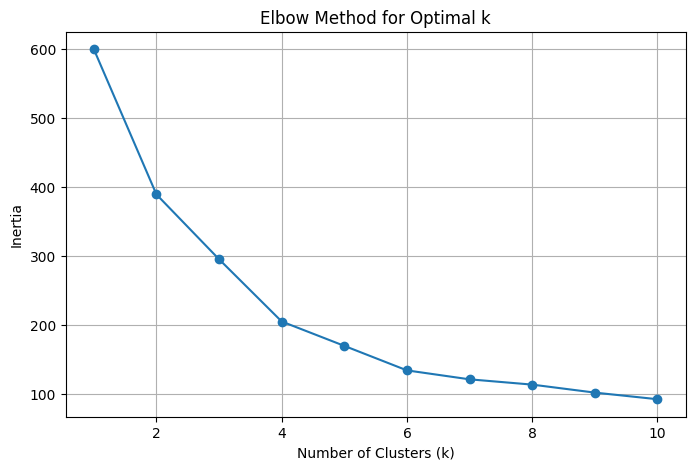

In [6]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [7]:
# Choose best k (let’s assume k=5 from elbow)
kmeans_final = KMeans(n_clusters=4, init="k-means++", random_state=42)
kmeans_final.fit(X_scaled)



,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [8]:
# Print final inertia
print("Final inertia for k=4:", kmeans_final.inertia_)

Final inertia for k=4: 205.22514747675913


In [9]:
# Function to predict cluster for a new customer
def predict_customer(age, income, spending):
    # Convert input into dataframe
    new_data = pd.DataFrame([[age, income, spending]], columns=["Age", "Annual Income (k$)", "Spending Score (1-100)"])
    
    # Scale it using the same scaler
    new_data_scaled = scaler.transform(new_data)
    
    # Predict cluster
    cluster = kmeans_final.predict(new_data_scaled)[0]
    return cluster

# Example usage
age = int(input("Enter Age: "))
income = float(input("Enter Annual Income (k$): "))
spending = float(input("Enter Spending Score (1-100): "))

predicted_cluster = predict_customer(age, income, spending)
print(f"The customer belongs to Cluster: {predicted_cluster}")


Enter Age:  29
Enter Annual Income (k$):  66
Enter Spending Score (1-100):  100


The customer belongs to Cluster: 1


C:\Users\LENOVO P14S\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
